# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [79]:
import pandas as pd

In [81]:
df = pd.read_csv('previsao_de_renda.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.

3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 


- Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
var_qualitativa = df.select_dtypes(include=['object','bool'])
var_qualitativa.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,False,True,Empresário,Secundário,Solteiro,Casa
1,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
2,2015-01-01,F,True,True,Empresário,Superior completo,Casado,Casa
3,2015-01-01,F,False,True,Servidor público,Superior completo,Casado,Casa
4,2015-01-01,M,True,False,Assalariado,Secundário,Solteiro,Governamental


In [91]:
var_qualitativa[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda',
                 'educacao', 'estado_civil', 'tipo_residencia']].value_counts()

sexo  posse_de_veiculo  posse_de_imovel  tipo_renda   educacao             estado_civil  tipo_residencia
F     False             True             Assalariado  Secundário           Casado        Casa               877
                                         Pensionista  Secundário           Casado        Casa               628
M     True              True             Assalariado  Secundário           Casado        Casa               609
F     False             True             Assalariado  Superior completo    Casado        Casa               441
                        False            Assalariado  Secundário           Casado        Casa               380
                                                                                                           ... 
M     True              False            Pensionista  Primário             Casado        Casa                 1
      False             False            Assalariado  Superior completo    Casado        Estúdio              1

/tmp/ipykernel_12468/1727025200.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
/tmp/ipykernel_12468/1727025200.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
/tmp/ipykernel_12468/1727025200.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


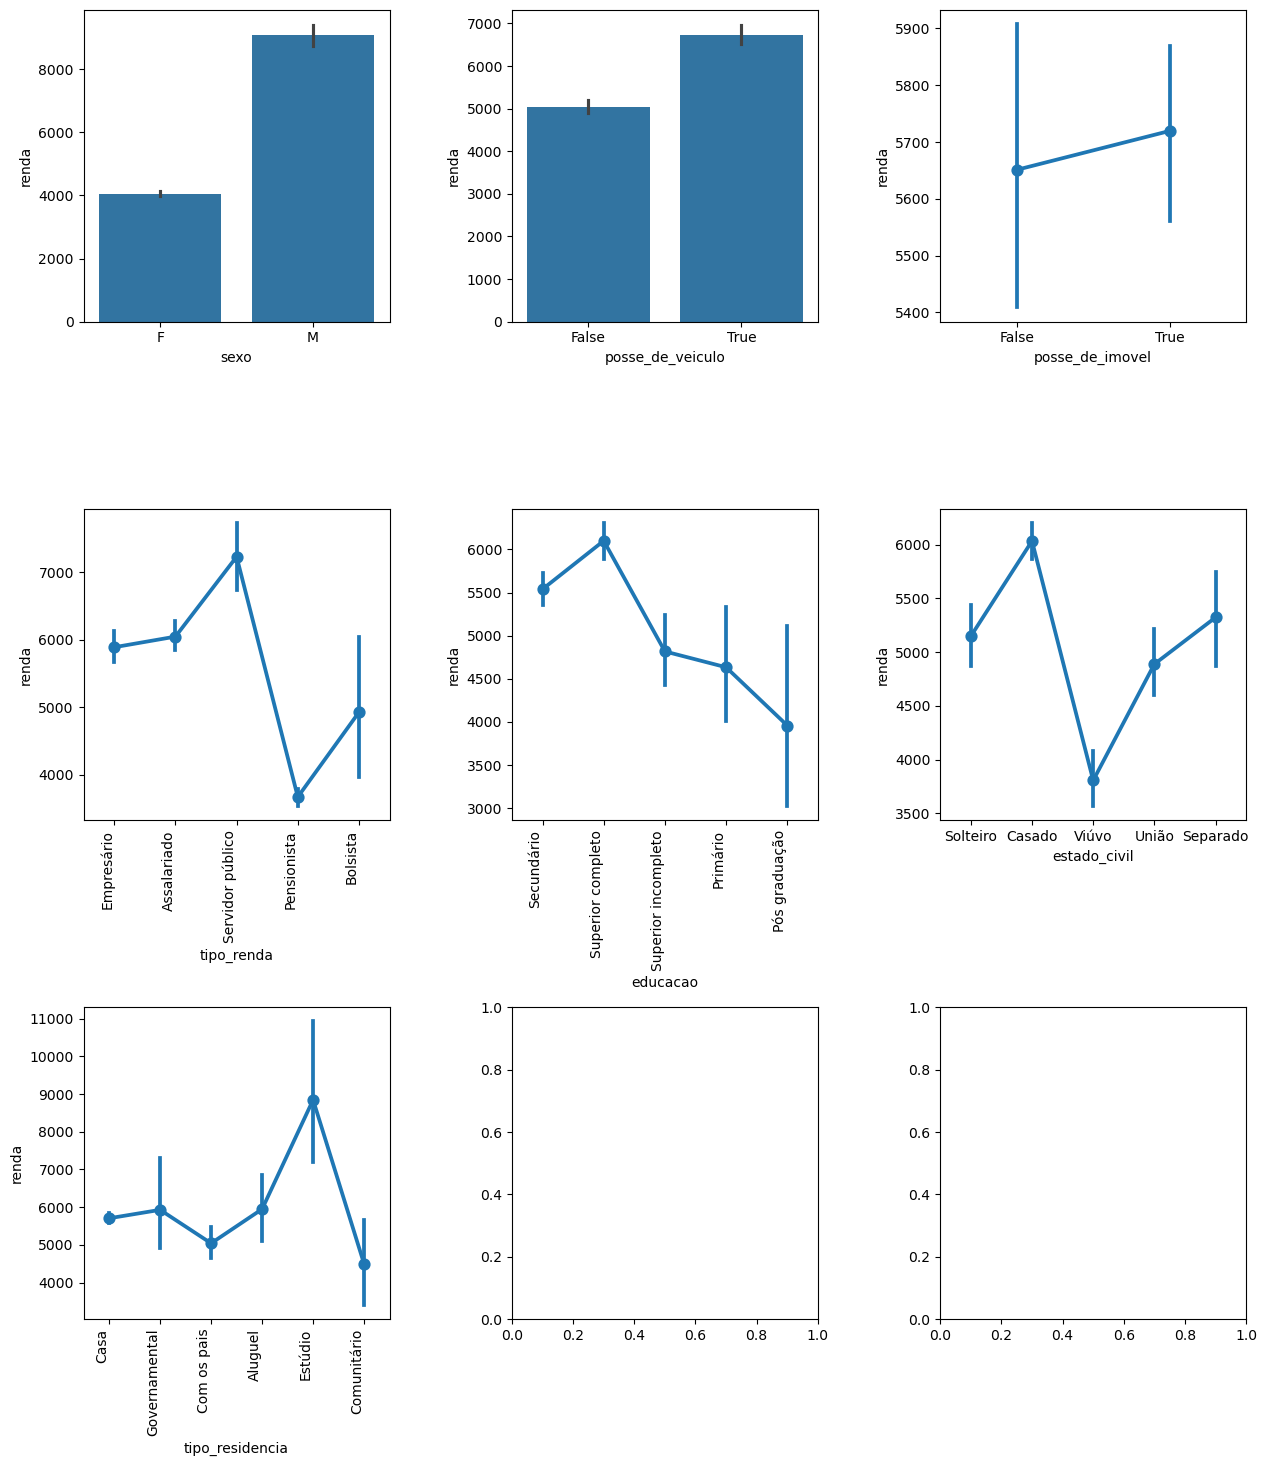

In [93]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(3, 3)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'sexo', data = df)
sns.barplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_veiculo', data = df)
sns.pointplot(ax = axes[0, 2],y = 'renda', x = 'posse_de_imovel', data = df)
tipo_renda = sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'tipo_renda', data = df)
educação = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'educacao', data = df)
sns.pointplot(ax = axes[1, 2],y = 'renda', x = 'estado_civil', data = df)
tipo_residencia = sns.pointplot(ax = axes[2, 0],y = 'renda', x = 'tipo_residencia', data = df)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.4, hspace=0.6)

- Mantenha sempre a categoria mais frequente como casela de referência

In [95]:
y, x = patsy.dmatrices('''np.log(renda) ~ C(sexo, Treatment(0))
                               + C(posse_de_veiculo, Treatment(0))  
                               + C(posse_de_imovel, Treatment(0))
                               + C(tipo_renda, Treatment(1))
                               + C(educacao, Treatment(1))
                               + C(estado_civil, Treatment(1))
                               + C(tipo_residencia, Treatment(1))                                                           
                               + qtd_filhos
                               + idade
                               + tempo_emprego
                               + qt_pessoas_residencia
                       ''', data = df)
x

DesignMatrix with shape (12427, 25)
  Columns:
    ['Intercept',
     'C(sexo, Treatment(0))[T.M]',
     'C(posse_de_veiculo, Treatment(0))[T.True]',
     'C(posse_de_imovel, Treatment(0))[T.True]',
     'C(tipo_renda, Treatment(1))[T.Assalariado]',
     'C(tipo_renda, Treatment(1))[T.Empresário]',
     'C(tipo_renda, Treatment(1))[T.Pensionista]',
     'C(tipo_renda, Treatment(1))[T.Servidor público]',
     'C(educacao, Treatment(1))[T.Primário]',
     'C(educacao, Treatment(1))[T.Secundário]',
     'C(educacao, Treatment(1))[T.Superior completo]',
     'C(educacao, Treatment(1))[T.Superior incompleto]',
     'C(estado_civil, Treatment(1))[T.Casado]',
     'C(estado_civil, Treatment(1))[T.Solteiro]',
     'C(estado_civil, Treatment(1))[T.União]',
     'C(estado_civil, Treatment(1))[T.Viúvo]',
     'C(tipo_residencia, Treatment(1))[T.Aluguel]',
     'C(tipo_residencia, Treatment(1))[T.Com os pais]',
     'C(tipo_residencia, Treatment(1))[T.Comunitário]',
     'C(tipo_residencia, Treatm

- Avalie os parâmetros e veja se parecem fazer sentido prático.

#coef = Estimativa Beta,
#std err = erro padrao do Beta,
#t = estatistica t-estimativa/erro padrao
#P>|t| = P-value: probabilidade de observarmos um novo Beta chapeu sob H0, menos provavel que a estimativa atual
#[0.025	0.975] = Podemos dizer, com 95% de confianca, que o verdadeiro valor do parametro esta dentro desse intervalo

In [103]:

sm.OLS(y, x).fit().summary()

NameError: name 'sm' is not defined

1. Remova a variável menos significante e analise:

In [105]:
df2 = df.copy()

 - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.

In [108]:
df2['tipo_renda'] = df2['tipo_renda'].apply(lambda i: i if i not in ['Empresário', 'Assalariado'] else 'Empresário/Assalariado')
df2['tipo_renda'].value_counts()

tipo_renda
Empresário/Assalariado    11141
Pensionista                2582
Servidor público           1268
Bolsista                      9
Name: count, dtype: int64

In [110]:
df2['estado_civil'] = df2['estado_civil'].apply(lambda i: i if i not in ['União', 'Casado'] else 'União/Casado')
df2['estado_civil'] = df2['estado_civil'].apply(lambda i: i if i not in ['Solteiro', 'Separado'] else 'Solteiro/Separado')
df2['estado_civil'].value_counts()

estado_civil
União/Casado         11612
Solteiro/Separado     2677
Viúvo                  711
Name: count, dtype: int64

In [112]:
df2['educacao'] = df2['educacao'].apply(lambda i: i if i not in  ['Superior incompleto', 'Primário'] else 'Superior incompleto/Primário')
df2['educacao'].value_counts()


educacao
Secundário                      8895
Superior completo               5335
Superior incompleto/Primário     744
Pós graduação                     26
Name: count, dtype: int64

In [114]:
df2['tipo_residencia'] = df2['tipo_residencia'].apply(lambda i: i if i not in  ['Governamental', 'Aluguel'] else 'Governamental/Aluguel')
df2['tipo_residencia'].value_counts()


tipo_residencia
Casa                     13532
Com os pais                675
Governamental/Aluguel      646
Estúdio                     83
Comunitário                 64
Name: count, dtype: int64

- Observe os parâmetros e veja se algum se alterou muito.

/tmp/ipykernel_12468/3387026427.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
/tmp/ipykernel_12468/3387026427.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
/tmp/ipykernel_12468/3387026427.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


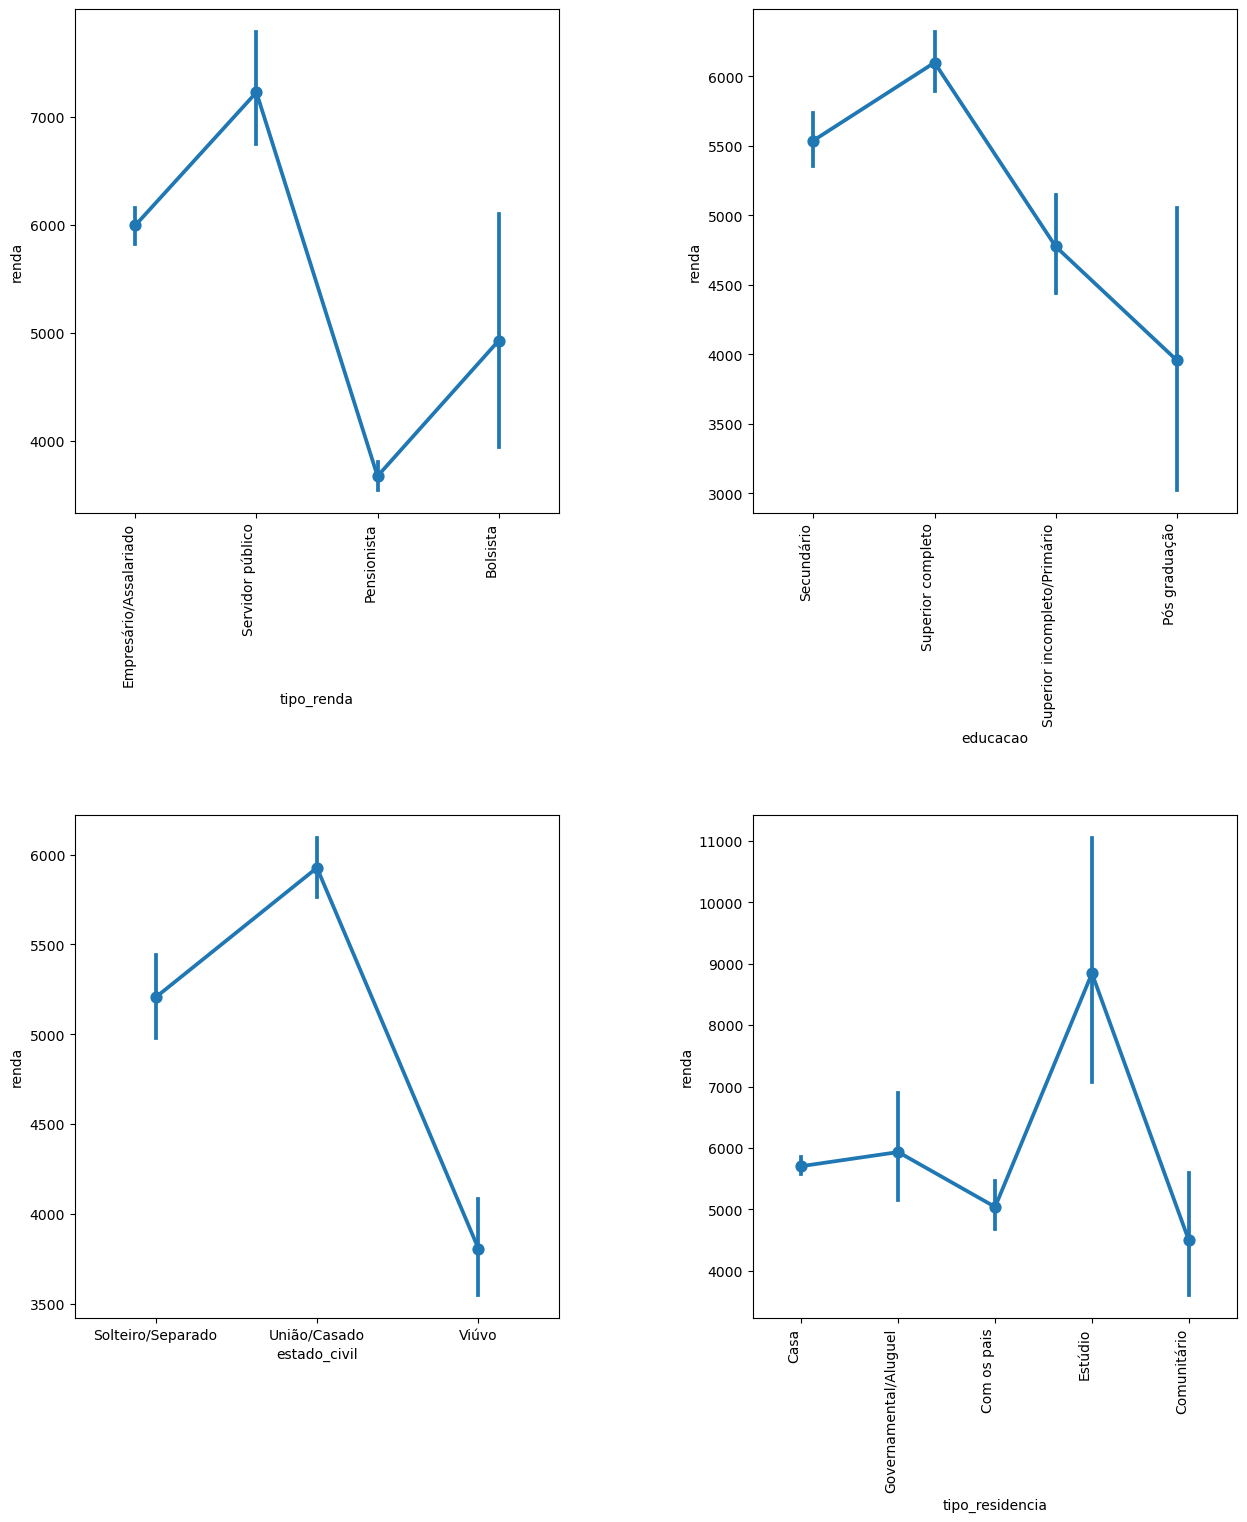

In [117]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(2, 2)

tipo_renda = sns.pointplot(ax = axes[0, 0],y = 'renda', x = 'tipo_renda', data = df2)
educação = sns.pointplot(ax = axes[0, 1],y = 'renda', x = 'educacao', data = df2)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'estado_civil', data = df2)
tipo_residencia = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'tipo_residencia', data = df2)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.4, hspace=0.6)

#coef = Estimativa Beta,
#std err = erro padrao do Beta,
#t = estatistica t-estimativa/erro padrao
#P>|t| = P-value: probabilidade de observarmos um novo Beta chapeu sob H0, menos provavel que a estimativa atual
#[0.025	0.975] = Podemos dizer, com 95% de confianca, que o verdadeiro valor do parametro esta dentro desse intervalo

In [126]:
import sm
sm.OLS(y, x).fit().summary()

ModuleNotFoundError: No module named 'sm'

1. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.

In [130]:
df2 = df.copy()

In [132]:
var_qualitativa = df.select_dtypes(include=['int64','float64'])
var_qualitativa.head()

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,15056,0,26,6.602740,1.0,8060.34
1,1,9968,0,28,7.183562,2.0,1852.15
2,2,4312,0,35,0.838356,2.0,2253.89
3,3,10639,1,30,4.846575,3.0,6600.77
4,4,7064,0,33,4.293151,1.0,6475.97


In [134]:
var_qualitativa.drop('id_cliente', axis = 1, inplace=True)
var_qualitativa.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,0,26,6.602740,1.0,8060.34
1,1,0,28,7.183562,2.0,1852.15
2,2,0,35,0.838356,2.0,2253.89
3,3,1,30,4.846575,3.0,6600.77
4,4,0,33,4.293151,1.0,6475.97


In [136]:
var_qualitativa['qtd_filhos'].value_counts()

qtd_filhos
0     10376
1      3037
2      1376
3       185
4        17
7         5
14        2
5         2
Name: count, dtype: int64

In [138]:
idade = var_qualitativa['idade'].value_counts()
idade.head()

idade
40    538
37    469
43    458
32    455
33    441
Name: count, dtype: int64

In [140]:
tempo_emprego = var_qualitativa['tempo_emprego'].value_counts()
tempo_emprego.head()

tempo_emprego
4.216438     38
6.934247     30
7.520548     29
15.449315    27
5.717808     26
Name: count, dtype: int64

In [142]:
qt_pessoas_residencia = var_qualitativa['qt_pessoas_residencia'].value_counts()
qt_pessoas_residencia.head()


qt_pessoas_residencia
2.0    8181
1.0    2752
3.0    2551
4.0    1311
5.0     179
Name: count, dtype: int64

/tmp/ipykernel_12468/3565445818.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
/tmp/ipykernel_12468/3565445818.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tempo_emprego.set_xticklabels(tempo_emprego.get_xticklabels(), rotation=90, horizontalalignment='right')


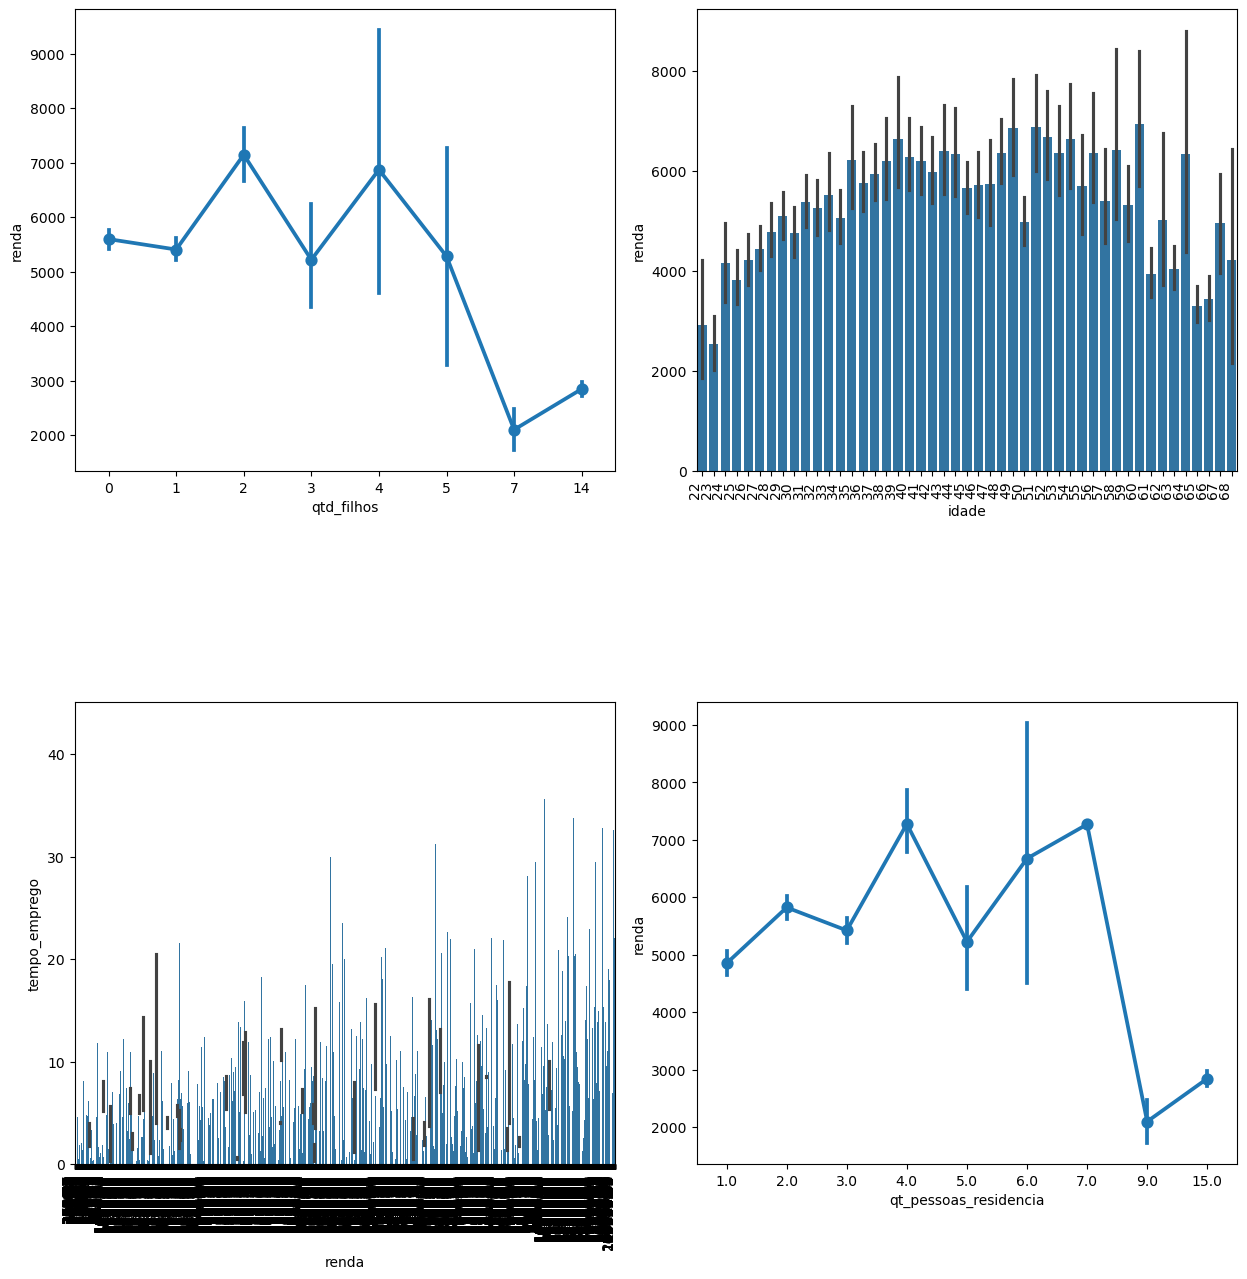

In [144]:
plt.close('all')

plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(2, 2)

sns.pointplot(ax = axes[0, 0],y = 'renda', x = 'qtd_filhos', data = df2)
idade = sns.barplot(ax = axes[0, 1],y = 'renda', x = 'idade', data = df2)
tempo_emprego = sns.barplot(ax = axes[1, 0],y='tempo_emprego', x='renda', data=df2)
sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'qt_pessoas_residencia', data = df2)

idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
tempo_emprego.set_xticklabels(tempo_emprego.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.15, hspace=0.5)

In [147]:
y, x = patsy.dmatrices()
x

TypeError: dmatrices() missing 1 required positional argument: 'formula_like'

In [149]:


#coef = Estimativa Beta,
#std err = erro padrao do Beta,
#t = estatistica t-estimativa/erro padrao
#P>|t| = P-value: probabilidade de observarmos um novo Beta chapeu sob H0, menos provavel que a estimativa atual
#[0.025	0.975] = Podemos dizer, com 95% de confianca, que o verdadeiro valor do parametro esta dentro desse intervalo

sm.OLS(y, x).fit().summary()



NameError: name 'sm' is not defined

In [151]:
df2.loc[df2['qtd_filhos']>=3, 'qtd_filhos'] = '3+'
df2['qtd_filhos'].value_counts()

/tmp/ipykernel_12468/3716542696.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['qtd_filhos']>=3, 'qtd_filhos'] = '3+'


qtd_filhos
0     10376
1      3037
2      1376
3+      211
Name: count, dtype: int64

In [153]:
df2.loc[df2['qt_pessoas_residencia']>=4, 'qt_pessoas_residencia'] = '4+'
df2['qt_pessoas_residencia'].value_counts()


/tmp/ipykernel_12468/1635889109.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4+' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['qt_pessoas_residencia']>=4, 'qt_pessoas_residencia'] = '4+'


qt_pessoas_residencia
2.0    8181
1.0    2752
3.0    2551
4+     1516
Name: count, dtype: int64

/tmp/ipykernel_12468/3876664463.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  qtd_filhos.set_xticklabels(qtd_filhos.get_xticklabels(), rotation=90, horizontalalignment='right')
/tmp/ipykernel_12468/3876664463.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  qt_pessoas_residencia.set_xticklabels(qt_pessoas_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


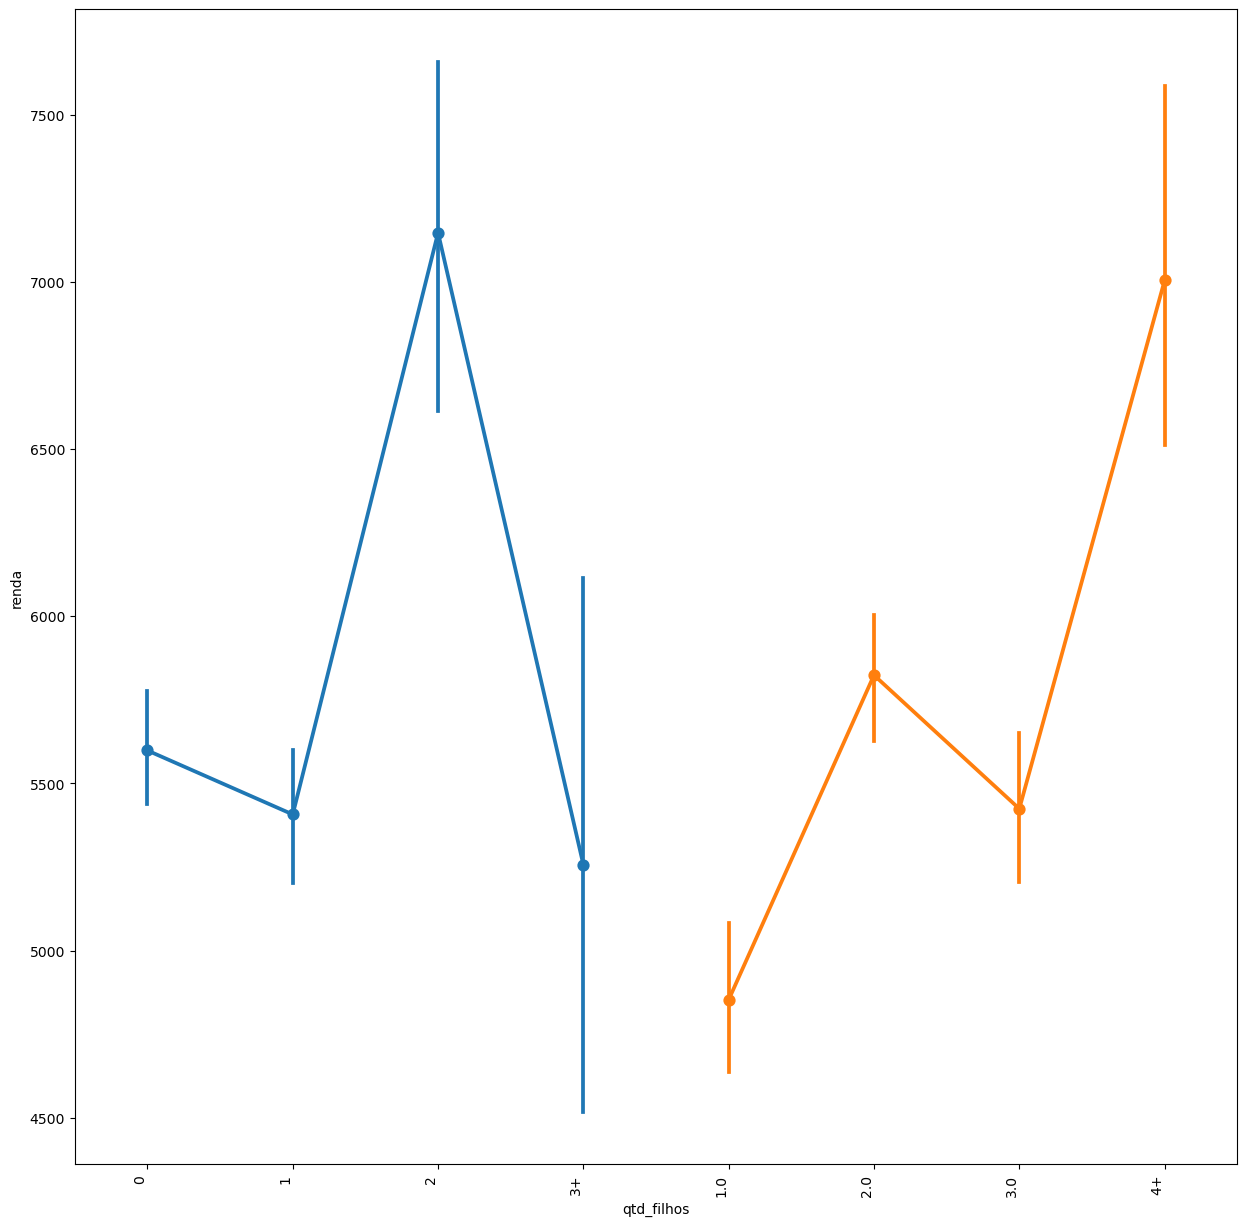

In [155]:
plt.close('all')

plt.rc('figure', figsize=(15, 15))

qtd_filhos = sns.pointplot(y = 'renda', x = 'qtd_filhos', data = df2)
qt_pessoas_residencia = sns.pointplot(y = 'renda', x = 'qt_pessoas_residencia', data = df2)

qtd_filhos.set_xticklabels(qtd_filhos.get_xticklabels(), rotation=90, horizontalalignment='right')
qt_pessoas_residencia.set_xticklabels(qt_pessoas_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.15, hspace=0.5)